## STEP-1 

In [1]:
#INSTALLATION OF TENSORFLOW
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 6.0 kB/s 
     |████████████████████████████████| 1.6 MB 49.2 MB/s 
     |████████████████████████████████| 5.8 MB 35.2 MB/s 
     |████████████████████████████████| 438 kB 34.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [4]:
import tensorflow as tf

In [5]:
print(tf.__version__)# to check tf version

2.9.1


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## STEP-2 DATA PRE-PROCESSING

In [7]:
#importing the dataset
from tensorflow.keras.datasets import fashion_mnist

In [8]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [9]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [11]:
np.max(x_train),np.min(x_train),np.mean(x_train)

(255, 0, 72.94035223214286)

In [13]:
np.max(y_train),np.min(y_train)

(9, 0)

In [14]:
class_names=["0 T-shirt/top","1 Trouser","2 Pullover","3 Dress","4 Coat","5 Sandal","6 Shirt","7 Sneaker","8 Bag","9 Ankle boot"]
print(class_names)

['0 T-shirt/top', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


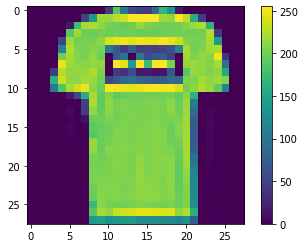

In [17]:
#data exploration
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [16]:
y_train[1]

0

In [18]:
# Normalizing the dataset
x_train=x_train/255.0
x_test=x_test/255.0

In [19]:
#flattening the dataset
# to convert 2d array into a vector (flattening)
x_train=x_train.reshape(-1,28*28)#-1 implies all images converted into a single dimension of 28*28
x_test=x_test.reshape(-1,28*28)
x_train.shape,x_test.shape

((60000, 784), (10000, 784))

## BUILDING THE MODEL

In [20]:
#Define an object
model=tf.keras.models.Sequential()
#sequence of layers

In [22]:
# Adding first fully connected hidden layer
# 1) units(No. of neurons)=128
# 2) Activation function=ReLU
# 3) input shape=784
model.add(tf.keras.layers.Dense(128,activation="relu",
                                input_shape=(784,)
                                ))

In [24]:
# Adding the 2nd layer with dropout
model.add(tf.keras.layers.Dropout(0.3))
# regularization technique, prevents overfitting

In [25]:
# Adding the output layer
# 1) units = 10
# 2) activation = softmax
model.add(tf.keras.layers.Dense(units=10,activation="softmax"))

## COMPILING THE MODEL

In [29]:
# Compiling the model
# 1) Optimizer=adam, (minimizes the loss function)
# 2) loss function=sparse_categorical_crossentropy (acts as guide to optimizer)
# 3) metrics=sparse_categorical_accuracy (to check accuracy for classification problems)
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["sparse_categorical_accuracy"])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Training the model
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5528 - sparse_categorical_accuracy: 0.8038
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4200 - sparse_categorical_accuracy: 0.8482
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3872 - sparse_categorical_accuracy: 0.8598
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3680 - sparse_categorical_accuracy: 0.8656
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3529 - sparse_categorical_accuracy: 0.8695
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3409 - sparse_categorical_accuracy: 0.8740
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3289 - sparse_categorical_accuracy: 0.8786
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3224 - sparse_categorical_accuracy: 0.8795
Epoch 9/10
1875/1875 [==========

## STEP 5: MODEL EVALUATION AND PREDICTION

In [32]:
# Model evaluation
test_loss,test_accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3437 - sparse_categorical_accuracy: 0.8771


In [33]:
print(test_accuracy)

0.8770999908447266


In [38]:
# Model prediction
#y_pred=model.predict_classes(x_test) this has been removed in Tensorflow version 2.6. Thus,
predict_x=model.predict(x_test) 
y_pred=np.argmax(predict_x,axis=1)

313/313 [==============================] - 1s 2ms/step


In [39]:
print(y_pred)

[9 2 1 ... 8 1 5]


In [43]:
y_pred[20] # predicted output

2

In [44]:
y_test[20] # actual output

2

In [45]:
# Confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[772   1  14  24   3   1 179   0   6   0]
 [  1 966   3  22   4   0   3   0   1   0]
 [ 11   0 756  10 127   0  94   0   2   0]
 [ 17   5   7 895  35   0  38   0   3   0]
 [  0   1  74  25 817   0  83   0   0   0]
 [  0   0   0   0   0 959   0  21   1  19]
 [ 80   0  78  28  70   0 731   0  13   0]
 [  0   0   0   0   0  23   0 957   0  20]
 [  2   0   3   6   5   5   5   4 970   0]
 [  1   0   0   0   0   4   0  47   0 948]]


In [47]:
acc_cm=accuracy_score(y_test,y_pred)
print(acc_cm)

0.8771
